In [14]:
import os
import json
import csv
import math
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline


In [15]:
def calculateLAE(a,b):
    return math.log2(abs(a-b)*100+0.125)

def calculateMLAE(predict_list,true_list):
    lae=[]
    for i in range(len(predict_list)):
        sum_=0
        lossTotal=0
        for j in range(len(predict_list[i])):
            lossTotal+=1
            sum_+=calculateLAE(predict_list[i][j],true_list[i][j])
        lae.append(sum_/lossTotal)
#     sorted_lae=sorted(lae)
#     quarter=len(sorted_lae)//4
#     data=sorted_lae[quarter:-quarter]
    avg=np.mean(lae)
    return lae
def compute_sum(data):
    sum=0
    for i in data:
        sum+=i
    return sum

def average(data):
    return sum(data) / len(data)
def bootstrap(data, B, c, func):
    array = np.array(data)
    n = len(array)
    sample_result_arr = []
    for i in range(B):
        # index_arr = np.random.randint(0, n, size=n)
        index_arr = np.random.choice(array, n)
        # print(index_arr)
        # data_sample = array[index_arr]
        data_sample = index_arr
        if func=="average":
            sample_result = average(data_sample)
        if func=="std":
            sample_result = np.std(data_sample)
        if func=="0.025":
            data_sample=sorted(data_sample)
            sample_result = data_sample[math.ceil(n*0.05)-1]
        if func=="0.975":
            data_sample=sorted(data_sample)
            sample_result = data_sample[int(n*0.95)-1]
        sample_result_arr.append(sample_result)

    a = 1 - c
    k1 = int(B * a / 2)
    k2 = int(B * (1 - a / 2))
    auc_sample_arr_sorted = sorted(sample_result_arr)
    lower = auc_sample_arr_sorted[k1]
    higher = auc_sample_arr_sorted[k2]

    # return lower, higher
    # print(lower, higher)
    # print((lower+higher)/2)
    # return auc_sample_arr_sorted
    return (lower+higher)/2,higher-(lower+higher)/2

find_float = lambda x: re.search("\d+(\.\d+)?",x).group()

In [27]:
typeToName={'posLen_tp_1_rand_c':'bar_type1_%d.json',
            'posLen_tp_2_rand_c':'stack_type2_%d.json',
            'posLen_tp_3_rand_c':'bar_type3_%d.json',
            'posLen_tp_4_rand_c':'stack_type4_%d.json',
            'posLen_tp_5_rand_c':'stack_type5_%d.json'}
tasks=['posLen_tp_1_rand_c',
        'posLen_tp_2_rand_c','posLen_tp_3_rand_c',
        'posLen_tp_4_rand_c','posLen_tp_5_rand_c']
params=['strokeWidth','bgcolor','x']
params_true={
    'strokeWidth':'strokeWidth',
    'bgcolor':'bgColorL',
    'x':'x',
    'markPosition':'markPosition'
}
testId_to_label={
    'x':{0:1,1:3,2:5,3:7},
    'bgcolor':{0:1,1:2,2:3,3:4,4:5,5:6,6:7},
    'bgColorL':{0:1,1:2,2:3,3:4,4:5,5:6,6:7},
    'strokeWidth':{0:1,1:2,2:3},
    'markPosition':{0:1,1:2,2:3,3:4,4:5,5:6,6:7}
}
predict_value={
      'posLen_tp_3_rand_c':{'markPosition':{0:[],1:[],2:[],3:[],4:[],5:[],6:[]}},
           'posLen_tp_5_rand_c':{'bgcolor':{0:[],1:[],2:[],3:[],4:[],5:[],6:[]}},
           'posLen_tp_4_rand_c':{'strokeWidth':{0:[],1:[],2:[]}}}
true_value={
      'posLen_tp_3_rand_c':{'markPosition':{0:[],1:[],2:[],3:[],4:[],5:[],6:[]}},
           'posLen_tp_5_rand_c':{'bgcolor':{0:[],1:[],2:[],3:[],4:[],5:[],6:[]}},
           'posLen_tp_4_rand_c':{'strokeWidth':{0:[],1:[],2:[]}}}

In [28]:
cnn_predict_value={
      'posLen_tp_3_rand_c':{'markPosition':{0:[],1:[],2:[],3:[],4:[],5:[],6:[]}},
           'posLen_tp_5_rand_c':{'bgcolor':{0:[],1:[],2:[],3:[],4:[],5:[],6:[]}},
           'posLen_tp_4_rand_c':{'strokeWidth':{0:[],1:[],2:[]}}}
cnn_true_value={
      'posLen_tp_3_rand_c':{'markPosition':{0:[],1:[],2:[],3:[],4:[],5:[],6:[]}},
           'posLen_tp_5_rand_c':{'bgcolor':{0:[],1:[],2:[],3:[],4:[],5:[],6:[]}},
           'posLen_tp_4_rand_c':{'strokeWidth':{0:[],1:[],2:[]}}}

In [29]:
path='./progressive_2/choose'
path='./human_2/progressive'
true_value_path='../test_result_4/dataset/%s_%s_testdata_%d/valid/target/'

for task in tasks:
    allfile=[i for i in os.listdir(path) if task in i.split("-")]
    cnnPath='../test_result_4/raw_result/resnet152_%s_lw/final_3/' % task
    cnn_infoPath='../test_result_4/raw_result/resnet152_%s_lw/final_3/%s_%s_testdata_%d_Iter_%d_result.json'
    iterName=int(re.findall('\d+',os.listdir(cnnPath)[0])[-1])
    for file in allfile:
        with open(os.path.join(path,file),'r') as f:
            f_csv=csv.reader(f)
            header=next(f_csv)
            for row in f_csv:
                param=file.split("-")[1]
                true_param=params_true[file.split("-")[1]]
#                 print(true_param)
                if param=='strokeWidth' and row[1]=='posAngle_pie':
                    true_param='strokewidth'
#                 print(true_value_path % (row[1],true_param,testId_to_label[true_param][int(row[2])])
#                           +typeToName[row[1]] % int(row[3]))
                with open(true_value_path % (task,true_param,testId_to_label[true_param][int(row[2])])
                          +typeToName[task] % int(row[3]),'r') as f_:
                    d=json.load(f_)
                    true_value[task][param][int(row[2])].append(d)
                if 'posAngle' in task:
                    g=[]
                    for ii in range(4,8):
                        g.append(float(find_float(row[ii])))
                    predict_value[task][param][int(row[2])].append(g)
                    pass
                else:
                    predict_value[task][param][int(row[2])].append([float(row[4])])


In [30]:
tasks=['posLen_tp_10_rand_c','posLen_tp_11_rand_c','posLen_tp_13_rand_c']
for task in tasks:
    cnnPath='../test_result_4/raw_result/resnet152_%s_lw/final_3/' % task
    iterName=int(re.findall('\d+',os.listdir(cnnPath)[0])[-1])
    for k,v in cnn_predict_value[task].items():
        
        for k2,v2 in v.items():
            
            index=testId_to_label[k][k2]
            true_param=k
            if 'color' in k:
                true_param='bgColorL'
            if 'stroke' in k and task=='posAngle_pie':
                true_param='strokewidth'
            cnn_infoPath='../test_result_4/raw_result/resnet152_%s_lw/final_3/%s_%s_testdata_%d_Iter_%d_result.json' % (task,task,true_param,index,iterName)
            with open(cnn_infoPath,'r') as ff:
                d=json.load(ff)
                cnn_predict_value[task][k][k2]=d['predict']
                cnn_true_value[task][k][k2]=d['true']

In [31]:
task_mlaes={}
cnn_task_mlaes={}
for k,v in predict_value.items():
    task_mlaes[k]=[]
    cnn_task_mlaes[k]=[]
    for k2,v2 in v.items():
        for k3,v3 in v2.items():
            if len(v3)==0:
                continue
            mlae=calculateMLAE(v3,true_value[k][k2][k3])
            cnn_mlae=calculateMLAE(cnn_predict_value[k][k2][k3],cnn_true_value[k][k2][k3])
            task_mlaes[k].append(mlae)
            cnn_task_mlaes[k].append(cnn_mlae)


<Figure size 360x252 with 0 Axes>

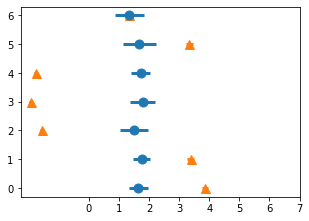

<Figure size 360x252 with 0 Axes>

<Figure size 360x252 with 0 Axes>

<Figure size 360x252 with 0 Axes>

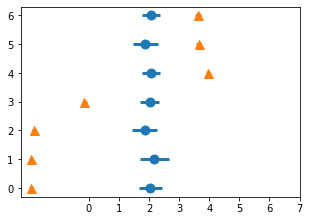

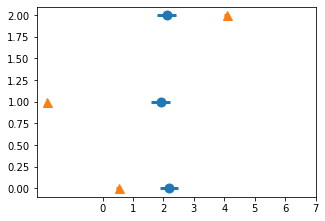

<Figure size 360x252 with 0 Axes>

In [32]:
#MLAE
cnn_color=tuple([i/255 for i in [254,127,14]])
human_color=tuple([i/255 for i in [31,120,180]])

human_mean_confidence={}
cnn_mean_confidence={}

for task,mlaes in task_mlaes.items():
    human_mean_confidence[task]=[]
    cnn_mean_confidence[task]=[]
    fig=plt.figure(figsize=(5,3.5))
    if len(mlaes)==0:
        continue
    for ii in range(0,len(mlaes)):
        mid=len(mlaes)//2
        
        mean_cnn,confidence_cnn = bootstrap(cnn_task_mlaes[task][ii], 10000, 0.95, "average")
        if mean_cnn!=0.0:
            cnn_mean_confidence[task].append([mean_cnn,confidence_cnn])
        
        y_cnn=[mean_cnn]
        x_cnn=len(mlaes)-ii-1
        line1=plt.errorbar(y_cnn,x_cnn,xerr=confidence_cnn,fmt='^',elinewidth=3,label='CNN',color=cnn_color,ms=9)
        
    for ii in range(0,len(mlaes)):

        mean_user,confidence_user = bootstrap(mlaes[ii], 10000, 0.95, "average")
        if mean_user!=0.0:
            
            human_mean_confidence[task].append([mean_user,confidence_user])
        y_user=[mean_user]
        x_user=len(mlaes)-ii-1
        line2=plt.errorbar(y_user,x_user,xerr=confidence_user,fmt='o--',elinewidth=3,ecolor=human_color,color=human_color,ms=9)
    plt.xticks(range(0,8))
    plt.savefig('./user_progressive_2/'+task+'-mlae.svg',bbox_inches = 'tight')
    plt.show()

<Figure size 360x360 with 0 Axes>

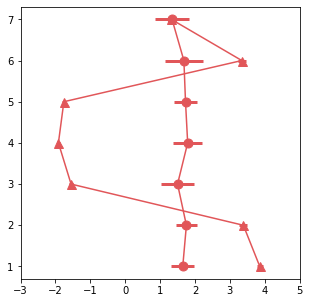

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

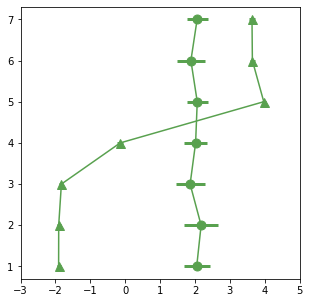

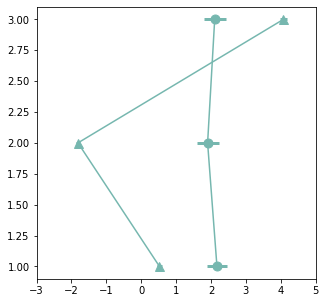

<Figure size 360x360 with 0 Axes>

In [33]:
tasks_shape_color={
    'posLen_tp_1_rand_c':['o','#F28E2C'],
    'posLen_tp_13_rand_c':['+','#E15659'],
    'posLen_tp_10_rand_c':['^','#59A14F'],
    'posLen_tp_11_rand_c':['x','#76B7AF'],
    'posLen_tp_12_rand_c':['*','#4E79A6'],
}
for task,v in human_mean_confidence.items():
    plt.figure(figsize=(5,5))
    if len(v)==0:
        continue
    for vv in range(len(v)):
        if vv==0:
            plt.errorbar(v[vv][0],len(v)-vv,xerr=v[vv][1],fmt='o',elinewidth=3,ecolor=tasks_shape_color[task][1],color=tasks_shape_color[task][1],ms=9)
        else:
            plt.errorbar(v[vv][0],len(v)-vv,xerr=v[vv][1],fmt='o',elinewidth=3,ecolor=tasks_shape_color[task][1],color=tasks_shape_color[task][1],ms=9)
            plt.plot([v[vv][0],v[vv-1][0]],[len(v)-vv,len(v)-vv+1],color=tasks_shape_color[task][1])
    v=cnn_mean_confidence[task]
    for vv in range(len(v)):
        if vv==0:
            plt.errorbar(v[vv][0],len(v)-vv,xerr=v[vv][1],fmt='^',elinewidth=3,ecolor=tasks_shape_color[task][1],color=tasks_shape_color[task][1],ms=9)
        else:
            plt.errorbar(v[vv][0],len(v)-vv,xerr=v[vv][1],fmt='^',elinewidth=3,ecolor=tasks_shape_color[task][1],color=tasks_shape_color[task][1],ms=9)
            plt.plot([v[vv][0],v[vv-1][0]],[len(v)-vv,len(v)-vv+1],color=tasks_shape_color[task][1])
    plt.xticks(range(-3,6))
    plt.savefig('./fig_results/'+task+'-mlae.svg')
    plt.show()

<Figure size 360x252 with 0 Axes>

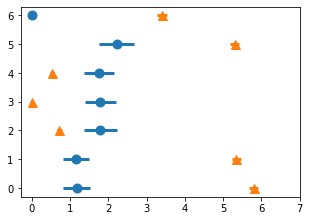

<Figure size 360x252 with 0 Axes>

<Figure size 360x252 with 0 Axes>

<Figure size 360x252 with 0 Axes>

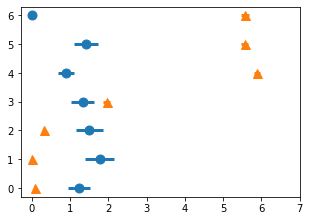

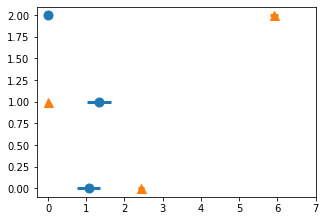

<Figure size 360x252 with 0 Axes>

In [35]:
#deviation
cnn_color=tuple([i/255 for i in [254,127,14]])
human_color=tuple([i/255 for i in [31,120,180]])

human_mean_confidence={}
cnn_mean_confidence={}

for task,mlaes in task_mlaes.items():
    human_mean_confidence[task]=[]
    cnn_mean_confidence[task]=[]
    fig=plt.figure(figsize=(5,3.5))
    if len(mlaes)==0:
        continue
    for ii in range(0,len(mlaes)):
        if task=='posLen_tp_10_rand_c':
            mid=5
        else:
            mid=len(mlaes)//2

        cnn_dev=[abs(cnn_task_mlaes[task][ii][iii]-cnn_task_mlaes[task][mid][iii]) for iii in range(len(cnn_task_mlaes[task][ii]))]
        
        
        mean_cnn,confidence_cnn = bootstrap(cnn_dev, 10000, 0.95, "average")
        if mean_cnn!=0.0:
            cnn_mean_confidence[task].append([mean_cnn,confidence_cnn])
        
        y_cnn=[mean_cnn]
        x_cnn=len(mlaes)-ii-1
        line1=plt.errorbar(y_cnn,x_cnn,xerr=confidence_cnn,fmt='^',elinewidth=3,label='CNN',color=cnn_color,ms=9)

        
    for ii in range(0,len(mlaes)):
#         if ii==0:
#             continue
        dev=[abs(mlaes[ii][iii]-mlaes[0][iii]) for iii in range(len(mlaes[ii]))]
        mean_user,confidence_user = bootstrap(dev, 10000, 0.95, "average")
        if mean_user!=0.0:
            
            human_mean_confidence[task].append([mean_user,confidence_user])
        y_user=[mean_user]
        x_user=len(mlaes)-ii-1
        line2=plt.errorbar(y_user,x_user,xerr=confidence_user,fmt='o--',elinewidth=3,ecolor=human_color,color=human_color,ms=9)
    plt.xticks(range(0,8))
    plt.savefig('./user_progressive_2/'+task+'.svg',bbox_inches = 'tight')
    plt.show()

<Figure size 360x360 with 0 Axes>

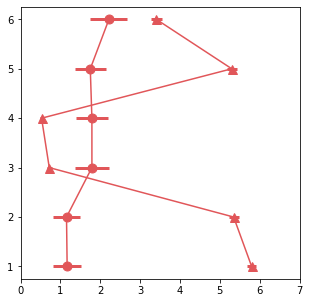

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

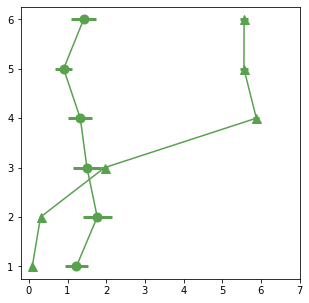

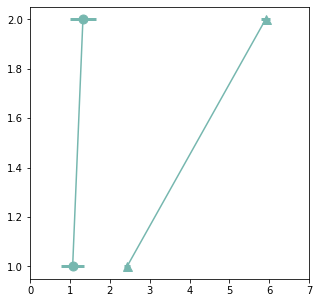

<Figure size 360x360 with 0 Axes>

In [36]:
tasks_shape_color={
    'posLen_tp_1_rand_c':['o','#F28E2C'],
    'posLen_tp_13_rand_c':['+','#E15659'],
    'posLen_tp_10_rand_c':['^','#59A14F'],
    'posLen_tp_11_rand_c':['x','#76B7AF'],
    'posLen_tp_12_rand_c':['*','#4E79A6'],

}
for task,v in human_mean_confidence.items():
    plt.figure(figsize=(5,5))
    if len(v)==0:
        continue
    for vv in range(len(v)):
        if vv==0:
            plt.errorbar(v[vv][0],len(v)-vv,xerr=v[vv][1],fmt='o',elinewidth=3,ecolor=tasks_shape_color[task][1],color=tasks_shape_color[task][1],ms=9)
        else:
            plt.errorbar(v[vv][0],len(v)-vv,xerr=v[vv][1],fmt='o',elinewidth=3,ecolor=tasks_shape_color[task][1],color=tasks_shape_color[task][1],ms=9)
            plt.plot([v[vv][0],v[vv-1][0]],[len(v)-vv,len(v)-vv+1],color=tasks_shape_color[task][1])
    v=cnn_mean_confidence[task]
    for vv in range(len(v)):
        if vv==0:
            plt.errorbar(v[vv][0],len(v)-vv,xerr=v[vv][1],fmt='^',elinewidth=3,ecolor=tasks_shape_color[task][1],color=tasks_shape_color[task][1],ms=9)
        else:
            plt.errorbar(v[vv][0],len(v)-vv,xerr=v[vv][1],fmt='^',elinewidth=3,ecolor=tasks_shape_color[task][1],color=tasks_shape_color[task][1],ms=9)
            plt.plot([v[vv][0],v[vv-1][0]],[len(v)-vv,len(v)-vv+1],color=tasks_shape_color[task][1])
    plt.xticks(range(0,8))
    plt.savefig('./fig_results/'+task+'-mlae-deviation.svg')
    plt.show()